The goal of this project is to study the extent to which Citi Bike usage in New York City is affected by weather.

I used publicly available weather data from a station in Central Park (accessed via NCEI CDO) and Citi Bike data available from their website.

Below, I plotted the total number of rides taken daily during August 2018.

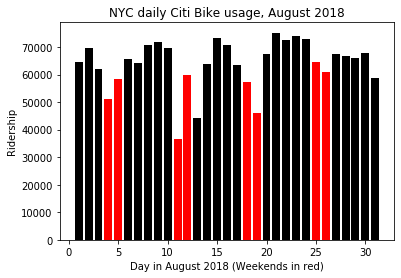

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Open dataset
df = pd.read_csv('201808-citibike-tripdata.csv')

#Initialize list of daily rides
rides_per_day = [0] * 31

#Make a table with only the day of the month each ride took place
ride_days = df.apply(lambda row: int(row['starttime'][8:10]), axis=1)

#Count the rides that took place on each day
for i in ride_days:
    rides_per_day[i-1] += 1

#Days in August with weekdays=0, weekends = 1
colors = [0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0]

#Days in October with weekdays=0, weekends = 1
#colors = [1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0]

#For distinguishing weekdays/weekends on the graph
for i in range(len(colors)):
    if colors[i] == 0:
        colors[i] = 'black'
    else:
        colors[i] = 'red'

#List of days
days = list(range(1,32))

#Generate the graph
plt.bar(days, rides_per_day, color=colors)
plt.title('NYC daily Citi Bike usage, August 2018')
plt.xlabel('Day in August 2018 (Weekends in red)')
plt.ylabel('Ridership')
plt.show()

From the graph above, it appears as though ridership is lower on the weekends, potentially because riders who use CitiBike to commute to work during the week stay home (they must not be PhD students). 

To determine if lower weekend ridership is due to reduced rush hour Citi Bike use, I will split the daily rides into 5 timeslots: 12-6AM, 6-9AM, 9-4PM, 4-7PM, 7-12AM (Night, Morning, Day, Afternoon, and Evening).

Below, I plotted stacked bar graphs of daily rides. I expect that they will show a significant reduction in rush hour ridership, whereas other times of day might be less affected.

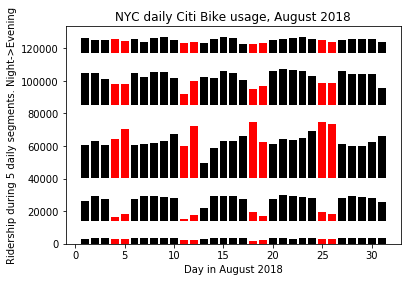

In [2]:
#Make a table with the hour and day of each ride
ride_days = df.apply(lambda row: [int(row['starttime'][8:10]),int(row['starttime'][11:13])], axis=1)

#Keep track of rides taking place during [night, morning, day, afternoon, evening]
rides_per_day = [[0,0,0,0,0] for i in range(31)]

for i in ride_days:
    time_of_day = -1
    if i[1] <= 6:
        time_of_day = 0
    elif i[1] <= 9:
        time_of_day = 1
    elif i[1] <= 16:
        time_of_day = 2
    elif i[1] <= 19:
        time_of_day = 3
    else:
        time_of_day = 4
        
    rides_per_day[i[0]-1][time_of_day] += 1

#Generate numpy arrays for plotting
numpy_rides_per_day = np.array(rides_per_day)
night = numpy_rides_per_day[:,0]
morning = numpy_rides_per_day[:,1]
day = numpy_rides_per_day[:,2]
afternoon = numpy_rides_per_day[:,3]
evening = numpy_rides_per_day[:,4]

#Separate bars to better compare columns
p_night = plt.bar(days, night, color=colors)
p_morning = plt.bar(days, morning, bottom=(10000+max(night)), color=colors)
p_day = plt.bar(days, day, bottom=(20000+max(night)+max(morning)), color=colors)
p_afternoon = plt.bar(days, afternoon, bottom=(30000+max(night)+max(morning)+max(day)), color=colors)
p_evening = plt.bar(days, evening, bottom=(40000+max(night)+max(morning)+max(day)+max(afternoon)), color=colors)
#plt.gca().axes.get_yaxis().set_visible(False)

plt.title('NYC daily Citi Bike usage, August 2018')
plt.xlabel('Day in August 2018')
plt.ylabel('Ridership during 5 daily segments. Night->Evening')
            
plt.show()

The stacked bar graph above shows that on weekends (August 4/5, etc.), there is less ridership during the morning and evening rush hours (6-9AM and 4-7PM). This is made up for by slightly increased ridership during the day (9AM-4PM). Below, I present this data as a percent of total daily rides.

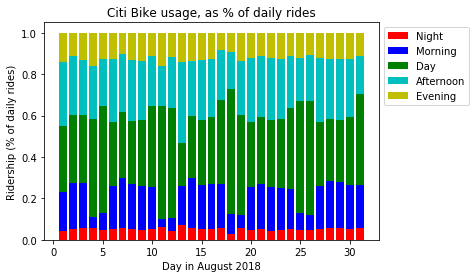

In [3]:
for j in rides_per_day:
    total_rides = sum(j)
    for k in range(len(j)):
        j[k] = float(j[k])/float(total_rides)        

numpy_rides_per_day = np.array(rides_per_day)
night = numpy_rides_per_day[:,0]
morning = numpy_rides_per_day[:,1]
day = numpy_rides_per_day[:,2]
afternoon = numpy_rides_per_day[:,3]
evening = numpy_rides_per_day[:,4]

p_night = plt.bar(days, night, color = 'r')
p_morning = plt.bar(days, morning, bottom=night, color='b')
p_day = plt.bar(days, day, bottom=night+morning, color='g')
p_afternoon = plt.bar(days, afternoon, bottom=night+morning+day, color='c')
p_evening = plt.bar(days, evening, bottom=night+morning+day+afternoon, color='y')

plt.title('Citi Bike usage, as % of daily rides')
plt.xlabel('Day in August 2018')
plt.ylabel('Ridership (% of daily rides)')
plt.legend(['Night','Morning','Day','Afternoon','Evening'], bbox_to_anchor=(1, 1))

plt.show()